In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
df = pd.read_csv('data/housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Just for testing, I set the target variable as 'TAX'

In [26]:
x = df['TAX']
y = df.drop(labels='TAX', axis=1)
y.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [27]:
metric_var = df.drop(labels='CHAS', axis=1)
metric_var.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
correlation = abs(metric_var.corr(method='pearson'))
correlation

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.200469,0.406583,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
ZN,0.200469,1.000000,0.533828,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
INDUS,0.406583,0.533828,1.000000,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
NOX,0.420972,0.516604,0.763651,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
RM,0.219247,0.311991,0.391676,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
AGE,0.352734,0.569537,0.644779,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
DIS,0.379670,0.664408,0.708027,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
RAD,0.625505,0.311948,0.595129,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
TAX,0.582764,0.314563,0.720760,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536
PTRATIO,0.289946,0.391679,0.383248,0.188933,0.355501,0.261515,0.232471,0.464741,0.460853,1.000000,0.177383,0.374044,0.507787


In [29]:
selected_features = correlation['TAX']
selected_features = selected_features[selected_features > 0.5]
selected_features = list(selected_features.keys())
selected_features

['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']

In [32]:
selected_df = df[selected_features]
selected_df.head()

,CRIM,INDUS,NOX,AGE,DIS,RAD,TAX,LSTAT
0,0.00632,2.31,0.538,65.2,4.0900,1,296,4.98
1,0.02731,7.07,0.469,78.9,4.9671,2,242,9.14
2,0.02729,7.07,0.469,61.1,4.9671,2,242,4.03
3,0.03237,2.18,0.458,45.8,6.0622,3,222,2.94
4,0.06905,2.18,0.458,54.2,6.0622,3,222,5.33


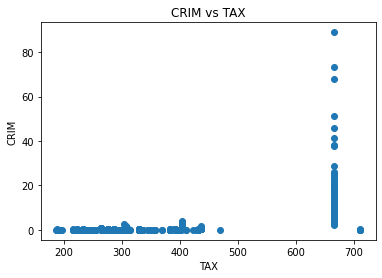

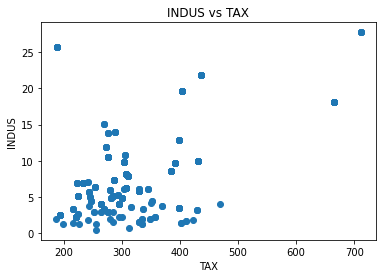

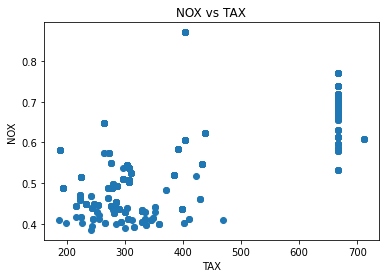

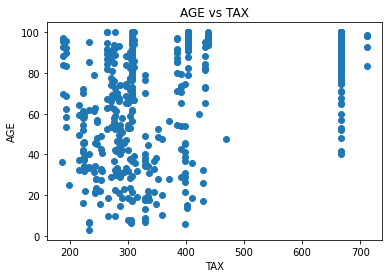

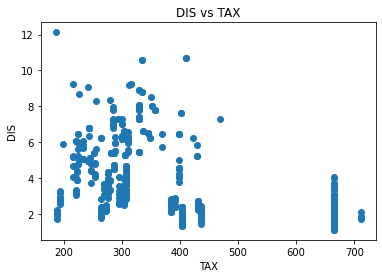

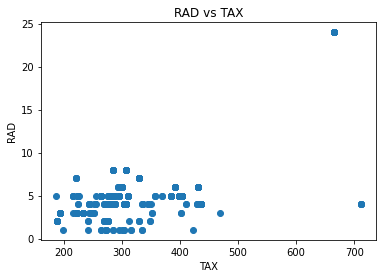

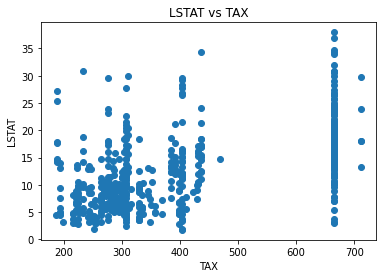

In [63]:
for feature in selected_features:
    plt.scatter(selected_df['TAX'], selected_df[feature])
    plt.title(f'{feature} vs TAX')
    plt.ylabel(f'{feature}')
    plt.xlabel('TAX')
    plt.show()

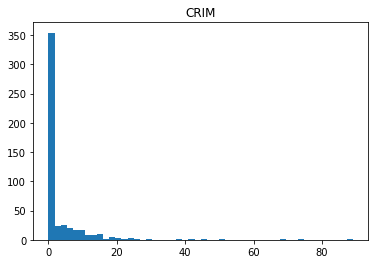

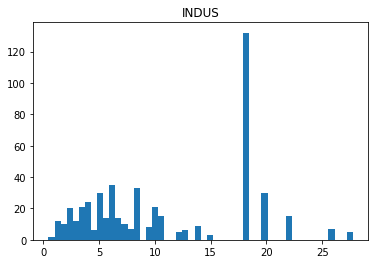

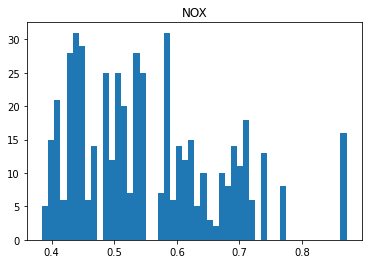

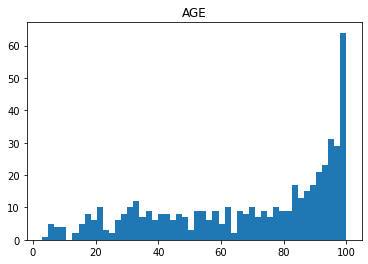

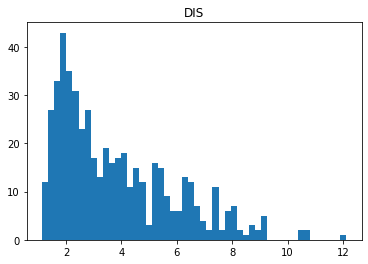

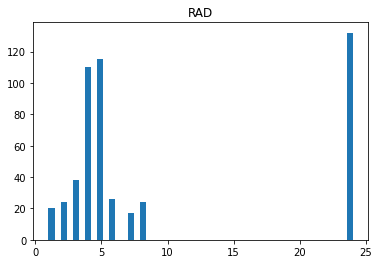

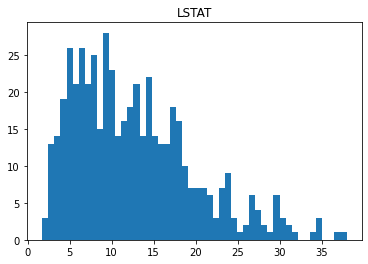

In [65]:
for feature in selected_features:
    plt.hist(selected_df[feature], bins=50)
    plt.title(f'{feature}')
#     plt.ylabel(f'{feature}')
#     plt.xlabel('TAX')
    plt.show()